# Clustering

## Problem 1: Segment Customers

The problem that we are going to solve in this assignment is to segment customers into different groups based on their shopping trends.

In [1]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load data

Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [7]:
# load the data
shopping_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/shopping_data.csv')
shopping_data.rename(
    columns={
        'CustomerID': 'customer_id',
        'Genre': 'genre',
        'Age': 'age',
        'Annual Income (k$)': 'annual_income',
        'Spending Score (1-100)': 'spending_score'
    },
    inplace=True
)
display(shopping_data.head())

# TODO: retain only anual_income and spending_score for clustering

df = shopping_data[['annual_income', 'spending_score']]
df

,customer_id,genre,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Hierarchical Clustering
First, we will apply hierarchical clustering and use dendrogram to help find the number of clusters within the data.

**TODO: Use dendrogram to plot hierarchical clustering and find the number of clusters that makes sense.**

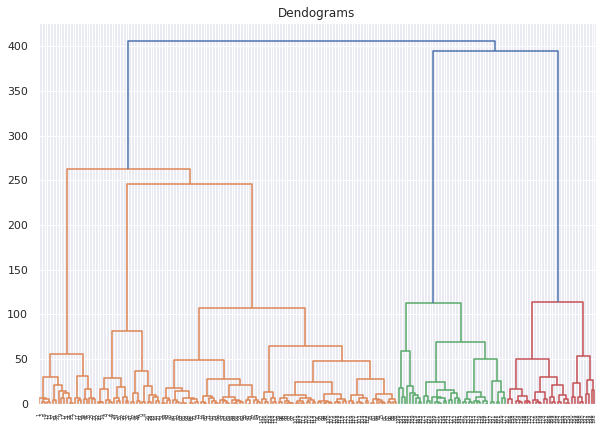

In [14]:
# TODO
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))  


**TODO: Apply hierarchical clustering based on the number of clusters you pick from the dendrogram, and visualize the results using scatterplot.**

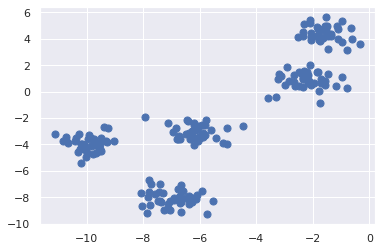

In [23]:
# TODO
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples = 199, centers =5, cluster_std=0.6, random_state=1)
plt.scatter(X[:,0], X[:,1], s = 50)

### K-means Clustering
Then, we will apply k-means to the same data and visualize the results.

**TODO: Vary the number of K from 2 to 10 and plot the Sum of Squared Error (SSE) as K increases and pick up the value of K that makes sense.**

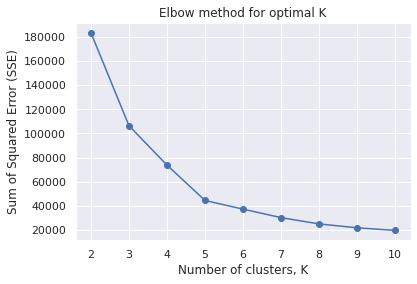

In [16]:
# TODO

from sklearn.cluster import KMeans


X = df

# Try different values of K
k_values = range(2, 11)
sse_values = []

for k in k_values:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    # Compute SSE
    sse_values.append(kmeans.inertia_)
    
# Plot SSE vs K
plt.plot(k_values, sse_values, 'o-')
plt.xlabel('Number of clusters, K')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow method for optimal K')
plt.show()


**TODO: Cluster the data using K-means based on the pre-defined value of K from the previous step and and visualize the results using scatterplot. **

[4 1 4 2 4 3 3 3 4 2 3 1 4 2 4 4 0 4 0 2 0 0 4 3 2 3 3 4 2 1 1 4 2 2 1 0 4
 0 2 0 2 1 3 3 2 4 3 4 1 3 0 2 0 1 4 2 1 1 0 3 3 2 2 2 0 0 1 0 4 0 4 1 2 2
 3 2 1 4 4 4 4 3 2 2 1 0 2 3 4 2 1 0 3 2 1 3 2 0 1 0 1 2 0 3 0 4 2 1 4 3 1
 0 3 3 2 1 1 0 3 1 2 4 2 0 0 3 1 0 4 0 1 1 4 3 3 4 4 4 3 3 0 2 0 3 2 4 4 0
 3 0 4 1 1 1 3 2 4 3 1 3 1 1 1 4 0 1 0 4 3 2 0 4 2 3 0 3 3 2 1 0 1 3 3 4 2
 0 3 1 1 0 4 0 2 1 2 4 1 0 2]


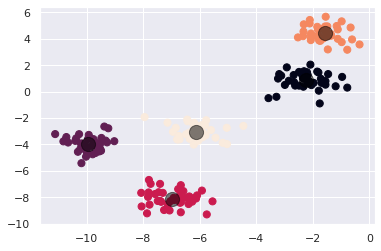

In [29]:
# TODO
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


## Problem 2: Clustering (Manually)

For the following dataset, perform the clustering “by hand”:

17 28 50 60 80 89 150 167 171 189 
1. 	Use the K-means algorithm with K= 3 to cluster the data
2. 	Use hierarchical agglomerative clustering with single linkage to cluster the data
3. 	Use hierarchical agglomerative clustering with complete linkage to cluster the data
4. 	For K-means What will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189

1. Three random initial centroids from the data points of 17, 80, 167 respectively. And assigned each data point to the nearest centroid as follows: 
Cluster 1:{17,28,50,60}
Cluster 2: {80, 89}
Cluster 3: {150, 167, 171, 189}. 
Calculated & repeated the entroids of each cluster as the mean of its data points. Centroid 1: 38.75 Centroid 2: 84.5, Centroid 3: 169.25.

2. We start by treating each data point as a separate cluster and then iteratively merge the closest pair of clusters until we have a single cluster containing all data points. Calculate the distance between each pair of clusters. Since we are using **single linkage**, the **minimum distance** between any two points in each pair of cluster as distance the clusters. Then we can identify the pair of clusters with the smallest distance and merge them into new cluster. (167) and (171) has the smallest distance of 4. Therefore, we merge these two clusters to create a new cluster (167,171). Finally calculating the distance between the new clusterand each of the remaining clusters. From our dataset, we need to calcuate from the cluster (167, 171). The results of distances shows as follows: ((167,171), 17) = 137, ((167,171), 28) = 139,((167,171), 50). 


3. Like above question, we will again calculate the distance between each pair of clusters. Since we are using **complete linkage** we will use the **maximum distance** between any two points in each pair of clusters as the distance. Then we identify the pair of clusters with the smallest distance and merge them into a new cluster. In this case, the smallest distance is between clusters (167) and (171), with a distance of 4. Therefore, we merge these two clusters to create a new cluster, (167,171). Finally recalculating the distances between the new cluster and each of the remaining clusters. In this case, we only need to calculate the distances between the new cluster, (167,171). Like #2, the results of distance distances shows as follows: ((167,171), 17) = 137, ((167,171), 28) = 139,((167,171), 50).

4. Compared to the result from Q1, the clusters will shift to Cluster 1: [167, 171, 189], Cluster 2: [80, 89, 150], Cluster 3: [17, 28, 50, 60] since the calcuatation of center of each cluster changes. 


## Bonus points
Use the dataset of accepted papers at the AAAI 2014 conference to find clusters of papers using K-Means. You can use paper title or abstract to build your features using [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model).

1. Vary the number of K from 2 to 6 and show if the results vary and assess the clusters obtained.

2. Make a case regarding which clusters ‘make sense’ e.g., is there a cluster were papers on reinforcement learning are together vs. another cluster which has papers on deep learning.

In [ ]:
# Load the Relevant libraries
import sklearn as sk

# URL for the AAAI (UW Repository)
aaai_data = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/AAAI2014AcceptedPapers.csv")

# TODO